In [2]:
import numpy as np
import pandas as pd

### Import Data

In [3]:
# The code was removed by Watson Studio for sharing.

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


## Pre-processing

In [4]:
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
from scipy import stats
from statsmodels.stats import weightstats as stests
from scipy.stats.stats import pearsonr

In [5]:
df.isnull().sum()

song_name           0
song_popularity     0
song_duration_ms    0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
song_name           18835 non-null object
song_popularity     18835 non-null int64
song_duration_ms    18835 non-null int64
acousticness        18835 non-null float64
danceability        18835 non-null float64
energy              18835 non-null float64
instrumentalness    18835 non-null float64
key                 18835 non-null int64
liveness            18835 non-null float64
loudness            18835 non-null float64
audio_mode          18835 non-null int64
speechiness         18835 non-null float64
tempo               18835 non-null float64
time_signature      18835 non-null int64
audio_valence       18835 non-null float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB


In [7]:
df = df[df['time_signature'] == 4]
df.shape

(17754, 15)

In [8]:
df = df[df['speechiness'] < 0.34]
df.shape

(16958, 15)

In [9]:
df['popularity'] = df['song_popularity'].apply(lambda x: 1 if (x>70)  else 0)
df["popularity"].value_counts()

0    13191
1     3767
Name: popularity, dtype: int64

In [10]:
df_song = df[['popularity','acousticness', 'danceability', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'audio_mode', 'tempo', 'audio_valence']]
df_song.head()

,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,tempo,audio_valence
0,1,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,167.060,0.474
1,0,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,105.256,0.370
2,1,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,123.881,0.324
3,1,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,122.444,0.198
4,0,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,172.011,0.574


## Exploratory Data Analysis

In [10]:
df_pop = df_song[df_song['popularity'] == 1]
df_not = df_song[df_song['popularity'] == 0]

#### Instrumentalness v popularity

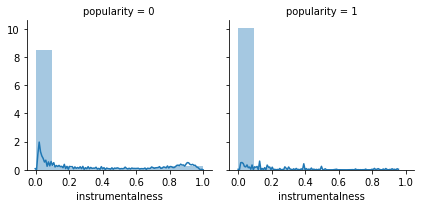

In [11]:
g = sns.FacetGrid(df_song, col = "popularity")
g.map(sns.distplot, "instrumentalness", bins = 10)
plt.show()

In [12]:
ztest ,pval = stests.ztest(df_pop['instrumentalness'], x2=df_not['instrumentalness'], value=0)
print("{0:1.5e}".format(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

6.46163e-89
reject null hypothesis


In [13]:
corr, pval = pearsonr(df_song['instrumentalness'], df_song['popularity'])
print('%0.5f' % float(corr))
if pval<0.05:
    print('Signficant correlation')
else:
    print('Insignificant correlation')

-0.15175
Signficant correlation


#### Accousticness v popularity

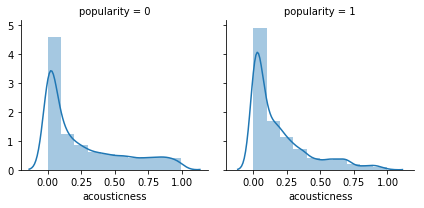

In [14]:
g = sns.FacetGrid(df_song, col = "popularity")
g.map(sns.distplot, "acousticness", bins = 10)
plt.show()

In [15]:
ztest ,pval = stests.ztest(df_pop['acousticness'], x2=df_not['acousticness'], value=0)
print("{0:1.5e}".format(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

1.60306e-37
reject null hypothesis


In [16]:
corr, pval = pearsonr(df_song['acousticness'], df_song['popularity'])
print('%0.5f' % float(corr))
if pval<0.05:
    print('Signficant correlation')
else:
    print('Insignificant correlation')

-0.09784
Signficant correlation


#### Liveness v popularity

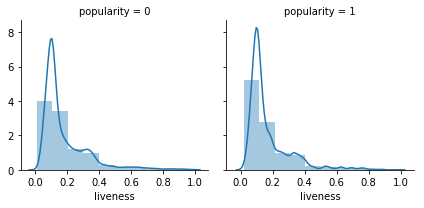

In [17]:
g = sns.FacetGrid(df_song, col = "popularity")
g.map(sns.distplot, "liveness", bins = 10)
plt.show()

In [18]:
ztest ,pval = stests.ztest(df_pop['liveness'], x2=df_not['liveness'], value=0)
print("{0:1.5e}".format(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

7.81709e-05
reject null hypothesis


In [19]:
corr, pval = pearsonr(df_song['liveness'], df_song['popularity'])
print('%0.5f' % float(corr))
if pval<0.05:
    print('Signficant correlation')
else:
    print('Insignificant correlation')

-0.03032
Signficant correlation


#### Audio_mode v popularity

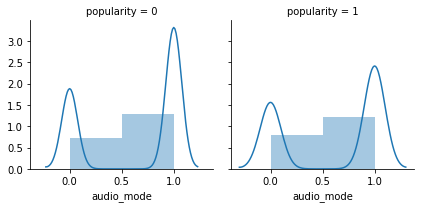

In [20]:
g = sns.FacetGrid(df_song, col = "popularity")
g.map(sns.distplot, "audio_mode", bins = 2)
plt.show()

In [21]:
ztest ,pval = stests.ztest(df_pop['audio_mode'], x2=df_not['audio_mode'], value=0)
print("{0:1.5e}".format(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

5.86861e-04
reject null hypothesis


In [22]:
corr, pval = pearsonr(df_song['audio_mode'], df_song['popularity'])
print('%0.5f' % float(corr))
if pval<0.05:
    print('Signficant correlation')
else:
    print('Insignificant correlation')

-0.02639
Signficant correlation


#### Audio_valence v popularity

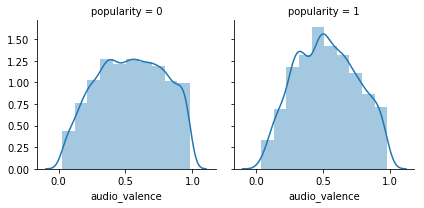

In [23]:
g = sns.FacetGrid(df_song, col = "popularity")
g.map(sns.distplot, "audio_valence", bins = 10)
plt.show()

In [24]:
ztest ,pval = stests.ztest(df_pop['audio_valence'], x2=df_not['audio_valence'], value=0)
print("{0:1.5e}".format(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

2.96481e-03
reject null hypothesis


In [25]:
corr, pval = pearsonr(df_song['audio_valence'], df_song['popularity'])
print('%0.5f' % float(corr))
if pval<0.05:
    print('Signficant correlation')
else:
    print('Insignificant correlation')

-0.02281
Signficant correlation


#### Tempo v popularity

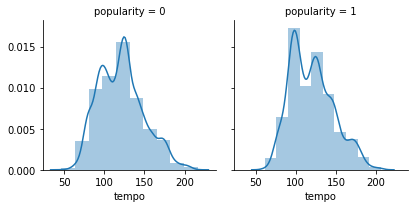

In [26]:
g = sns.FacetGrid(df_song, col = "popularity")
g.map(sns.distplot, "tempo", bins = 10)
plt.show()

In [27]:
ztest ,pval = stests.ztest(df_pop['tempo'], x2=df_not['tempo'], value=0)
print("{0:1.5e}".format(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

2.44459e-02
reject null hypothesis


In [28]:
corr, pval = pearsonr(df_song['tempo'], df_song['popularity'])
print('%0.5f' % float(corr))
if pval<0.05:
    print('Signficant correlation')
else:
    print('Insignificant correlation')

-0.01728
Signficant correlation


#### Key v popularity

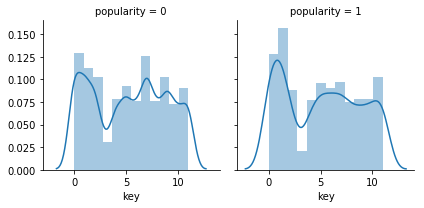

In [29]:
g = sns.FacetGrid(df_song, col = "popularity")
g.map(sns.distplot, "key", bins = 12)
plt.show()

In [30]:
ztest ,pval = stests.ztest(df_pop['key'], x2=df_not['key'], value=0)
print("{0:1.5e}".format(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

3.38594e-02
reject null hypothesis


In [31]:
corr, pval = pearsonr(df_song['key'], df_song['popularity'])
print('%0.5f' % float(corr))
if pval<0.05:
    print('Signficant correlation')
else:
    print('Insignificant correlation')

-0.01629
Signficant correlation


#### Energy v popularity

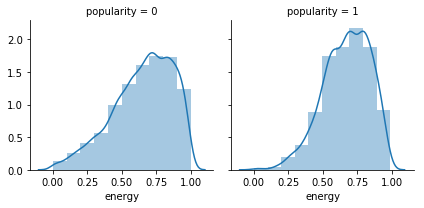

In [32]:
g = sns.FacetGrid(df_song, col = "popularity")
g.map(sns.distplot, "energy", bins = 10)
plt.show()

In [33]:
ztest ,pval = stests.ztest(df_pop['energy'], x2=df_not['energy'], value=0)
print("{0:1.5e}".format(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

4.33088e-08
reject null hypothesis


In [34]:
corr, pval = pearsonr(df_song['energy'], df_song['popularity'])
print('%0.5f' % float(corr))
if pval<0.05:
    print('Signficant correlation')
else:
    print('Insignificant correlation')

0.04202
Signficant correlation


#### Danceability v popularity

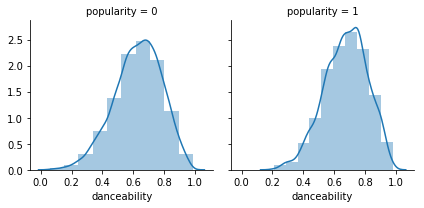

In [35]:
g = sns.FacetGrid(df_song, col = "popularity")
g.map(sns.distplot, "danceability", bins = 10)
plt.show()

In [36]:
ztest ,pval = stests.ztest(df_pop['danceability'], x2=df_not['danceability'], value=0)
print("{0:1.5e}".format(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

3.71593e-59
reject null hypothesis


In [37]:
corr, pval = pearsonr(df_song['danceability'], df_song['popularity'])
print('%0.5f' % float(corr))
if pval<0.05:
    print('Signficant correlation')
else:
    print('Insignificant correlation')

0.12360
Signficant correlation


#### Loudness v popularity

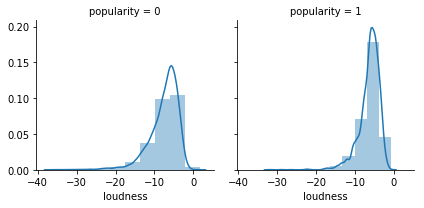

In [38]:
g = sns.FacetGrid(df_song, col = "popularity")
g.map(sns.distplot, "loudness", bins = 10)
plt.show()

In [39]:
ztest ,pval = stests.ztest(df_pop['loudness'], x2=df_not['loudness'], value=0)
print("{0:1.5e}".format(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

2.79661e-84
reject null hypothesis


In [40]:
corr, pval = pearsonr(df_song['loudness'], df_song['popularity'])
print('%0.5f' % float(corr))
if pval<0.05:
    print('Signficant correlation')
else:
    print('Insignificant correlation')

0.14774
Signficant correlation


## Classification Analysis

#### Normalize Data

In [41]:
Features = df_song[['acousticness', 'danceability', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'audio_mode', 'tempo', 'audio_valence']]
X = Features
y = df_song[['popularity']].values

In [42]:
X = preprocessing.StandardScaler().fit(X).transform(X)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


#### Split Data

In [43]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

LR = LogisticRegression(C=0.01, solver='liblinear')
LR.fit(x_train,y_train)
yhat_LR_test = LR.predict(x_test)

print("Train set accuracy: ", metrics.accuracy_score(y_train, LR.predict(x_train)))
print("Test set accuracy: ", metrics.accuracy_score(y_test, yhat_LR_test))

Train set accuracy:  0.7766638584667228
Test set accuracy:  0.7792845911949685


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### K Nearest Neighbors

In [45]:
from sklearn.neighbors import KNeighborsClassifier

Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat=neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykern

The best accuracy was with 0.8435534591194969 with k= 1


In [46]:
k = 1
kn = KNeighborsClassifier(n_neighbors = k).fit(x_train, y_train)
yhat_kn_test = kn.predict(x_test)
print("Train set accuracy: ", metrics.accuracy_score(y_train, kn.predict(x_train)))
print("Test set accuracy: ", metrics.accuracy_score(y_test, yhat_kn_test))

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app


Train set accuracy:  0.9946082561078349
Test set accuracy:  0.8435534591194969


### Decision Tree

In [47]:
from sklearn.tree import DecisionTreeClassifier


depths = 10
mean_acc = np.zeros((depths-1))
std_acc = np.zeros((depths-1))
ConfustionMx = [];
for n in range(1,depths):
    
    #Train Model and Predict  
    neigh = DecisionTreeClassifier(criterion="entropy", max_depth = n).fit(x_train,y_train)
    yhat=neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
print( "The best accuracy was with", mean_acc.max(), "with depths =", mean_acc.argmax()+1)



The best accuracy was with 0.7873427672955975 with depths = 9


In [48]:
dt = DecisionTreeClassifier(criterion="entropy", max_depth = 9)
dt.fit(x_train, y_train)
yhat_dt_test = dt.predict(x_test)


print("Train set accuracy: ", metrics.accuracy_score(y_train, dt.predict(x_train)))
print("Test set accuracy: ", metrics.accuracy_score(y_test, yhat_dt_test))

Train set accuracy:  0.8144903117101938
Test set accuracy:  0.7847877358490566


### Support Vector Machine

In [49]:
from sklearn import svm 

clf = svm.SVC(kernel='rbf')
clf.fit(x_train, y_train) 
yhat_svm_test = clf.predict(x_test)

print("Train set accuracy: ", metrics.accuracy_score(y_train, clf.predict(x_train)))
print("Test set accuracy: ", metrics.accuracy_score(y_test, yhat_svm_test))

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Train set accuracy:  0.7776748104465038
Test set accuracy:  0.7794811320754716


### Model Evaluation

In [50]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [53]:
yhat_LR = LR.predict(x_test)
yhat_kn = kn.predict(x_test)
yhat_dt = dt.predict(x_test)
yhat_svm = clf.predict(x_test)

In [54]:
print("Logistic regression accuracy: ")
print("Jaccard index: ", jaccard_similarity_score(y_test, yhat_LR))
print("F1 score: ", f1_score(y_test, yhat_LR, average='weighted'))

print("\nK-neighbors accuracy: ")
print("Jaccard index: ", jaccard_similarity_score(y_test, yhat_kn))
print("F1 score: ", f1_score(y_test, yhat_kn, average='weighted'))

print("\nDecision Tree accuracy: ")
print("Jaccard index: ", jaccard_similarity_score(y_test, yhat_dt))
print("F1 score: ", f1_score(y_test, yhat_dt, average='weighted'))

print("\nSupport Vector Machines accuracy: ")
print("Jaccard index: ", jaccard_similarity_score(y_test, yhat_svm))
print("F1 score: ", f1_score(y_test, yhat_svm, average='weighted'))

Logistic regression accuracy: 
Jaccard index:  0.7792845911949685
F1 score:  0.6840921651734617

K-neighbors accuracy: 
Jaccard index:  0.8435534591194969
F1 score:  0.8475014287967145

Decision Tree accuracy: 
Jaccard index:  0.7847877358490566
F1 score:  0.7480220357255795

Support Vector Machines accuracy: 
Jaccard index:  0.7794811320754716
F1 score:  0.6830846021475507
